In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm
from skimage import exposure
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
from skimage import exposure

from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder

In [2]:
# The training data set 
trn_img_path = "dataset/train/"

# The testing data set 
tst_img_path = "dataset/test/"

# Lets create 2 set of arrays for train & testing data's. One for to store the Image data and anther one for label details
X_train =[] # Stores the training image hog data
label_train = [] # Stores the training image label

X_test = [] # Stores the testing image hog data
label_test = [] # Stores the testing image label

scene_label=['Acne','Eczema','Healthy','Psoriasis']

In [3]:
def hog_data_extractor(jpeg_path):
    jpeg_data = cv2.imread(jpeg_path)
    jpeg_data=cv2.resize(jpeg_data,(300,300)) 
    hog_data = feature.hog(jpeg_data)/255.0
    return hog_data

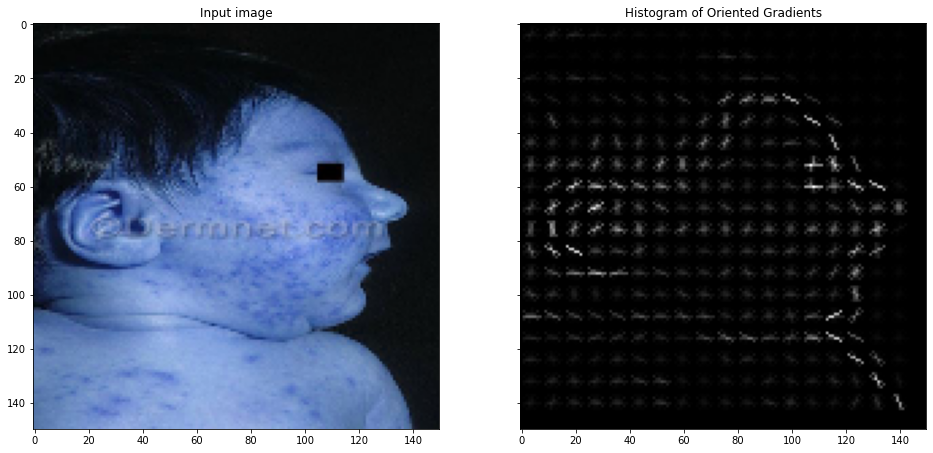

In [4]:
import matplotlib.pyplot as plt
from skimage import exposure


jpeg_path = 'C:/Users/Ameer Abdullah/Desktop/Skin/dataset/train/Acne/23.jpg'

jpeg_data = cv2.imread(jpeg_path)
jpeg_data=cv2.resize(jpeg_data,(150,150)) 
#fd,hog_data = feature.hog(,visualize=True)/255.0
fd, hog_image = feature.hog(jpeg_data, visualize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(jpeg_data) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [5]:
def jpeg_to_array (scene_type, img_root_path,data_type):
    scene_path = os.path.join(img_root_path,scene_type.lower())
    print('Loading ' + data_type +' images for scene type '+scene_type)
    for img in os.listdir(scene_path):
        img_path = os.path.join(scene_path,img)
        if img_path.endswith('.jpg'):
            if(data_type == 'Training'):
                X_train.append(hog_data_extractor(img_path))
                label_train.append(str(scene_type))
            if(data_type =='Testing'):
                X_test.append(hog_data_extractor(img_path))
                label_test.append(np.array(str(scene_type)))

In [6]:
[jpeg_to_array(scene,trn_img_path,'Training')for scene in scene_label]
len(X_train)

Loading Training images for scene type Acne
Loading Training images for scene type Eczema
Loading Training images for scene type Healthy
Loading Training images for scene type Psoriasis


2963

In [7]:
[jpeg_to_array(scene,tst_img_path,'Testing')for scene in scene_label]
len(X_test)

Loading Testing images for scene type Acne
Loading Testing images for scene type Eczema
Loading Testing images for scene type Healthy
Loading Testing images for scene type Psoriasis


460

In [8]:
le = LabelEncoder()
y_train = le.fit_transform(label_train)
y_test = le.fit_transform(label_test)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC,SVC

In [11]:
import time
start_time = time.time()

model_linear = LinearSVC()
#print(model)
history = model_linear.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))


--- 135.47241234779358 seconds ---


In [12]:
#pred = model.predict(X_test)
#model_linear.score(X_test,y_test)
start_time = time.time()
s_pred = model_linear.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test,s_pred))
print(classification_report(y_test,s_pred))
print(accuracy_score(y_test, s_pred))

--- 0.3292996883392334 seconds ---
[[81  5  6  8]
 [34 31  8 27]
 [ 3  0 96  1]
 [90 26  5 39]]
              precision    recall  f1-score   support

           0       0.39      0.81      0.53       100
           1       0.50      0.31      0.38       100
           2       0.83      0.96      0.89       100
           3       0.52      0.24      0.33       160

    accuracy                           0.54       460
   macro avg       0.56      0.58      0.53       460
weighted avg       0.56      0.54      0.51       460

0.5369565217391304


In [13]:
import time
start_time = time.time()
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(X_train,y_train)
print("--- %s seconds for SVM(rbf)---" % (time.time() - start_time))


--- 963.3356273174286 seconds for SVM(rbf)---


In [14]:
#pred = model.predict(X_test)
#model_linear.score(X_test,y_test)
start_time = time.time()
s_pred = model_rbf.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
#Divide it to 460
print(confusion_matrix(y_test,s_pred))
print(classification_report(y_test,s_pred))
print(accuracy_score(y_test, s_pred))

--- 105.27909708023071 seconds ---
[[ 80   9   0  11]
 [ 16  47   1  36]
 [  0   0 100   0]
 [ 52  24   0  84]]
              precision    recall  f1-score   support

           0       0.54      0.80      0.65       100
           1       0.59      0.47      0.52       100
           2       0.99      1.00      1.00       100
           3       0.64      0.53      0.58       160

    accuracy                           0.68       460
   macro avg       0.69      0.70      0.68       460
weighted avg       0.68      0.68      0.67       460

0.6760869565217391
